# Satvik Atmakuri
# 3B6
# 121810306028

In [1]:
import pandas as pd

In [5]:
#importing data
data=pd.read_excel("Problem 1 Dataset.xlsx")

In [6]:
data.head()

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
0,0,2020-04-01,AN,0,0,0,Andaman and Nicobar Islands
1,1,2020-04-01,AP,67,0,1,Andhra Pradesh
2,2,2020-04-01,AR,0,0,0,Arunachal Pradesh
3,3,2020-04-01,AS,15,0,0,Assam
4,4,2020-04-01,BR,3,0,0,Bihar


In [9]:
#dropping useless columns
data.drop(['Unnamed: 0'],1,inplace=True)

In [10]:
data

,Date,State,Confirmed,Deceased,Recovered,State_Name
0,2020-04-01,AN,0,0,0,Andaman and Nicobar Islands
1,2020-04-01,AP,67,0,1,Andhra Pradesh
2,2020-04-01,AR,0,0,0,Arunachal Pradesh
3,2020-04-01,AS,15,0,0,Assam
4,2020-04-01,BR,3,0,0,Bihar
...,...,...,...,...,...,...
5689,2020-05-31,TT,8789,222,4928,Total
5690,2020-05-31,UN,448,0,0,State Unassigned
5691,2020-05-31,UP,374,4,192,Uttar Pradesh
5692,2020-05-31,UT,158,0,0,Uttarakhand


In [11]:
#droping rows with state value TT
data=data.loc[(data['State']!='TT')]

In [12]:
data

,Date,State,Confirmed,Deceased,Recovered,State_Name
0,2020-04-01,AN,0,0,0,Andaman and Nicobar Islands
1,2020-04-01,AP,67,0,1,Andhra Pradesh
2,2020-04-01,AR,0,0,0,Arunachal Pradesh
3,2020-04-01,AS,15,0,0,Assam
4,2020-04-01,BR,3,0,0,Bihar
...,...,...,...,...,...,...
5688,2020-05-31,TR,45,0,1,Tripura
5690,2020-05-31,UN,448,0,0,State Unassigned
5691,2020-05-31,UP,374,4,192,Uttar Pradesh
5692,2020-05-31,UT,158,0,0,Uttarakhand


In [14]:
#finding out distinct number of dates in the given dataset
n=len(pd.unique(data['Date']))
n

146

In [16]:
#finding out distinct number of states in the given dataset
n2=len(pd.unique(data['State_Name']))
n2

38

In [46]:
states=data['State']
states

0       AN
1       AP
2       AR
3       AS
4       BR
        ..
5688    TR
5690    UN
5691    UP
5692    UT
5693    WB
Name: State, Length: 5548, dtype: object

In [52]:
#calculatig total number of Confirmed Recovered Deceased cases wrt to states
df=data.groupby(["State"]).agg({"Confirmed":"sum","Recovered":"sum","Deceased":"sum"})

In [53]:
df.head()

,Confirmed,Recovered,Deceased
State,,,
AN,1119,346,16
AP,196789,112870,1753
AR,1948,1245,3
AS,52716,37225,130
BR,68148,43820,388


In [54]:
#finding out death rate
df['death_rate']=(df['Deceased']/df['Confirmed'])*100

In [55]:
df['death_rate']

State
AN    1.429848
AP    0.890802
AR    0.154004
AS    0.246604
BR    0.569349
CH    1.507159
CT    0.698730
DD         NaN
DL    2.867923
DN    0.141143
GA    0.866824
GJ    3.809117
HP    0.426649
HR    1.167206
JH    0.920284
JK    1.858958
KA    1.835025
KL    0.321850
LA    0.438871
LD         NaN
MH    3.499736
ML    0.505051
MN    0.248679
MP    2.589979
MZ    0.000000
NL    0.232558
OR    0.687673
PB    2.474750
PY    1.514168
RJ    1.545024
SK    0.118765
TG    0.806297
TN    1.626461
TR    0.540070
UN         NaN
UP    1.760053
UT    1.182883
WB    2.192406
Name: death_rate, dtype: float64

In [56]:
#finding out cure rate
df['cure_rate']=(df['Recovered']/df['Confirmed'])*100
df['cure_rate']

State
AN    30.920465
AP    57.355848
AR    63.911704
AS    70.614235
BR    64.301227
CH    58.553127
CT    73.393829
DD          NaN
DL    89.820605
DN    70.359915
GA    71.618072
GJ    74.358142
HP    61.240564
HR    83.179999
JH    41.850724
JK    66.973651
KA    50.729839
KL    60.205590
LA    73.793103
LD          NaN
MH    65.941819
ML    34.848485
MN    59.216661
MP    73.575101
MZ    53.531599
NL    31.744186
OR    66.036299
PB    65.382222
PY    60.739779
RJ    71.701772
SK    42.042755
TG    71.325120
TN    78.496472
TR    66.080139
UN          NaN
UP    58.180850
UT    62.936333
WB    70.340272
Name: cure_rate, dtype: float64

No handles with labels found to put in legend.


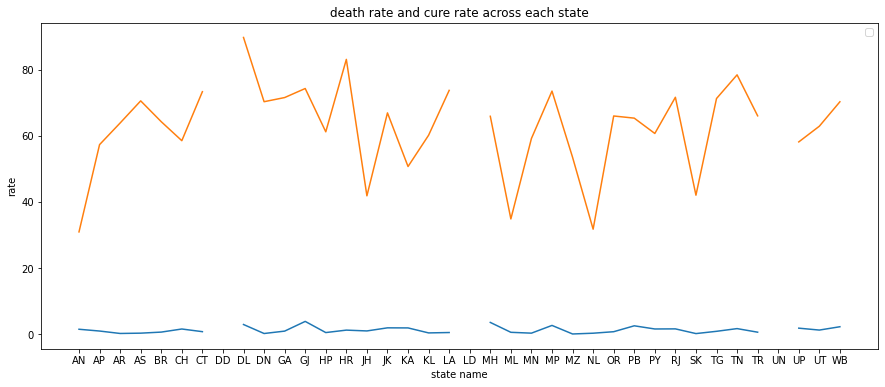

In [66]:
#ploting death rate and cure rate wrt states
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(data['State'].unique(),df['death_rate'])
plt.plot(data['State'].unique(),df['cure_rate'])
plt.title('death rate and cure rate across each state')
plt.xlabel('state name')
plt.ylabel('rate')
plt.legend()

No handles with labels found to put in legend.


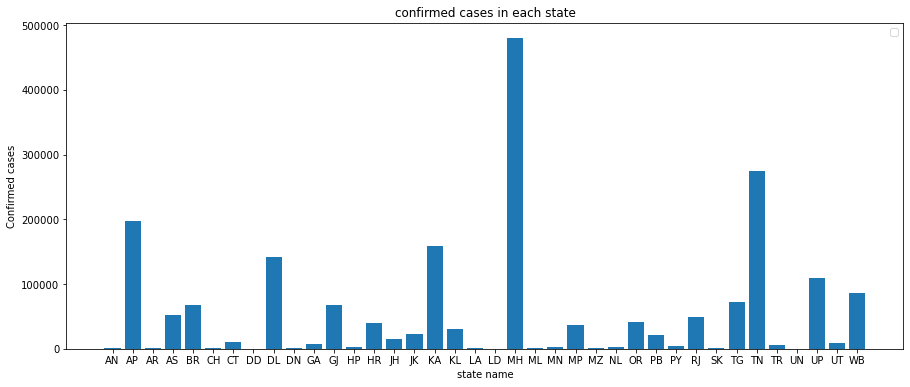

In [70]:
#confirmed cases in each state
plt.figure(figsize=(15,6))
plt.bar(data['State'].unique(),df['Confirmed'])
plt.title('confirmed cases in each state')
plt.xlabel('state name')
plt.ylabel('Confirmed cases')
plt.legend()

No handles with labels found to put in legend.


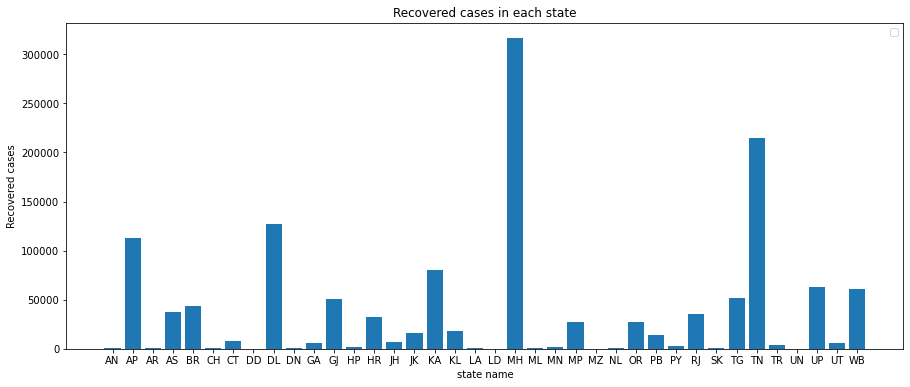

In [71]:
#Recovered cases in each state
plt.figure(figsize=(15,6))
plt.bar(data['State'].unique(),df['Recovered'])
plt.title('Recovered cases in each state')
plt.xlabel('state name')
plt.ylabel('Recovered cases')
plt.legend()

No handles with labels found to put in legend.


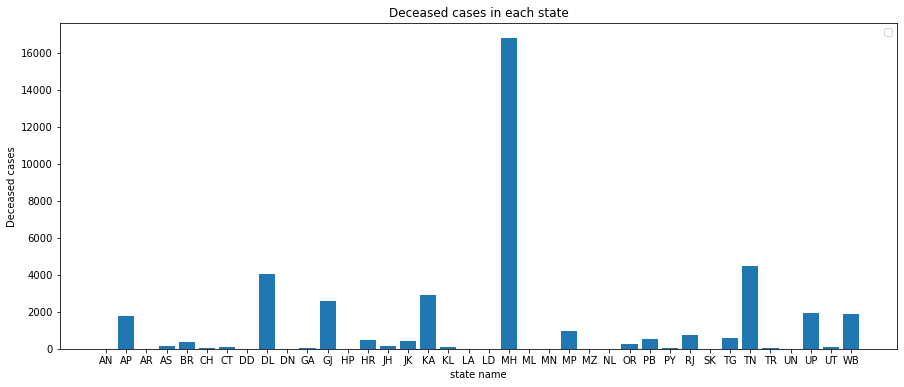

In [72]:
#Deceased cases in each state
plt.figure(figsize=(15,6))
plt.bar(data['State'].unique(),df['Deceased'])
plt.title('Deceased cases in each state')
plt.xlabel('state name')
plt.ylabel('Deceased cases')
plt.legend()

In [87]:
#top 10 states with highest number of Confirmed cases
top10_cases=df.sort_values('Confirmed', ascending=False)
print(top10_cases['Confirmed'].head(10))
top10=top10_cases.head(10)
index = top10.index
sta = list(index)
sta

State
MH    479779
TN    273969
AP    196789
KA    158254
DL    141531
UP    108974
WB     86754
TG     73050
BR     68148
GJ     67811
Name: Confirmed, dtype: int64


['MH', 'TN', 'AP', 'KA', 'DL', 'UP', 'WB', 'TG', 'BR', 'GJ']

In [88]:
#top 10 states with highest number of Recovered cases
top10_cases=df.sort_values('Recovered', ascending=False)
print(top10_cases['Recovered'].head(10))
top10=top10_cases.head(10)
index = top10.index
sta = list(index)
sta

State
MH    316375
TN    215056
DL    127124
AP    112870
KA     80282
UP     63402
WB     61023
TG     52103
GJ     50423
BR     43820
Name: Recovered, dtype: int64


['MH', 'TN', 'DL', 'AP', 'KA', 'UP', 'WB', 'TG', 'GJ', 'BR']

In [89]:
#calculatig total number of Confirmed Recovered Deceased cases wrt to dates
df2=data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deceased":"sum"})

In [90]:
df2

,Confirmed,Recovered,Deceased
Date,,,
2020-03-14,81,9,2
2020-03-15,27,4,0
2020-03-16,15,1,0
2020-03-17,11,1,1
2020-03-18,37,0,0
...,...,...,...
2020-08-02,52672,40355,760
2020-08-03,50488,43070,806
2020-08-04,51282,51220,849


In [93]:
df2.reset_index(level=0, inplace=True)

In [94]:
df2

,Date,Confirmed,Recovered,Deceased
0,2020-03-14,81,9,2
1,2020-03-15,27,4,0
2,2020-03-16,15,1,0
3,2020-03-17,11,1,1
4,2020-03-18,37,0,0
...,...,...,...,...
141,2020-08-02,52672,40355,760
142,2020-08-03,50488,43070,806
143,2020-08-04,51282,51220,849
144,2020-08-05,51387,39552,804


No handles with labels found to put in legend.


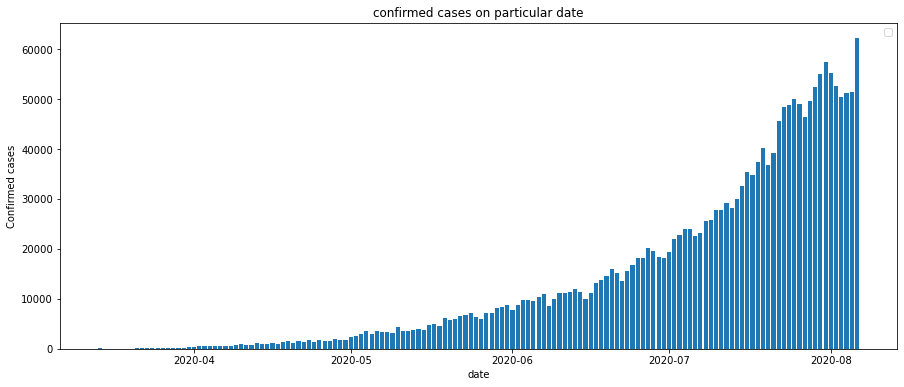

In [97]:
#confirmed cases on a particular date
plt.figure(figsize=(15,6))
plt.bar(df2['Date'],df2['Confirmed'])
plt.title('confirmed cases on particular date')
plt.xlabel('date')
plt.ylabel('Confirmed cases')
plt.legend()

No handles with labels found to put in legend.


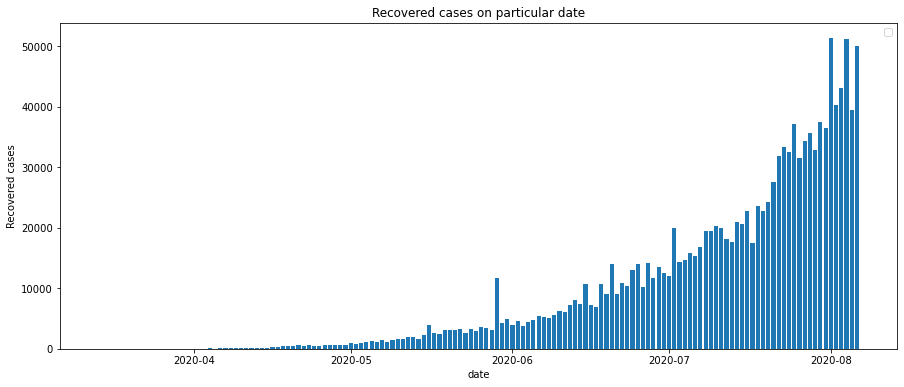

In [99]:
#Recovered cases on a particular date
plt.figure(figsize=(15,6))
plt.bar(df2['Date'],df2['Recovered'])
plt.title('Recovered cases on particular date')
plt.xlabel('date')
plt.ylabel('Recovered cases')
plt.legend()

No handles with labels found to put in legend.


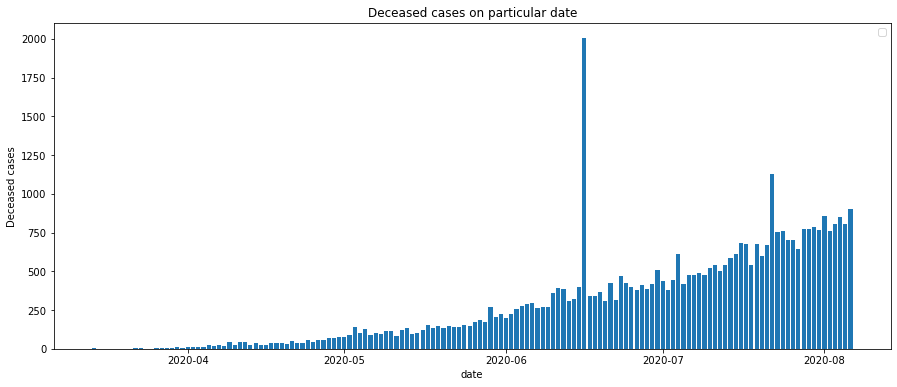

In [101]:
#Deceased cases on a particular date
plt.figure(figsize=(15,6))
plt.bar(df2['Date'],df2['Deceased'])
plt.title('Deceased cases on particular date')
plt.xlabel('date')
plt.ylabel('Deceased cases')
plt.legend()

No handles with labels found to put in legend.


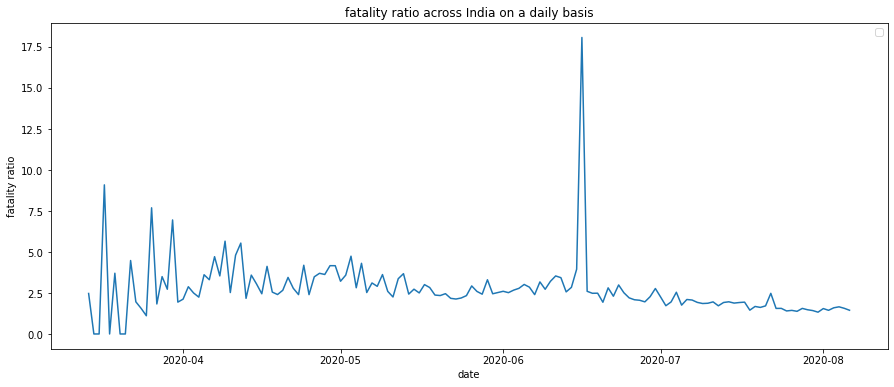

In [102]:
#fatality ratio across India on a daily basis
df2['fatality ratio']=(df2['Deceased']/df2['Confirmed'])*100
plt.figure(figsize=(15,6))
plt.plot(df2['Date'],df2['fatality ratio'])
plt.title('fatality ratio across India on a daily basis')
plt.xlabel('date')
plt.ylabel('fatality ratio')
plt.legend()

In [106]:
#total number of confirmed cases, death cases and recovered cases in India
total_Confirmed=df2['Confirmed'].sum()
total_Recovered=df2['Recovered'].sum()
total_Deceased=df2['Deceased'].sum()
print('total number of onfirmed cases:',total_Confirmed)
print('total number of Recovered cases:',total_Recovered)
print('total number of Deceased cases:',total_Deceased)

total number of onfirmed cases: 2020081
total number of Recovered cases: 1371244
total number of Deceased cases: 41538
